This notebook graphs the year-over-year return as well as return over a longer horizon of real estate and stock prices, with USA and Japan as two examples. It reveals the different characteristics of returns that define the two distinct investment profiles.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
directory = '../data'
assets = pd.ExcelFile(directory + '/JSTassetsR3.xlsx').parse('Data')
assets_filtered = assets.dropna()

In [10]:
assets_usa = assets_filtered[assets_filtered['country'] == 'USA']
assets_japan = assets_filtered[assets_filtered['country'] == 'Japan']

We shift the price columns to calculate the returns at both one-year (short-term) and five-year (medium-term) horizons.

In [11]:
assets_usa['home_one_year_return'] = assets_usa['hpnom'] / assets_usa['hpnom'].shift(1) - 1.0
assets_usa['stock_one_year_return'] = assets_usa['stocks'] / assets_usa['stocks'].shift(1) - 1.0
assets_usa['home_five_year_return'] = assets_usa['hpnom'] / assets_usa['hpnom'].shift(5) - 1.0
assets_usa['stock_five_year_return'] = assets_usa['stocks'] / assets_usa['stocks'].shift(5) - 1.0
assets_japan['home_one_year_return'] = assets_japan['hpnom'] / assets_japan['hpnom'].shift(1) - 1.0
assets_japan['stock_one_year_return'] = assets_japan['stocks'] / assets_japan['stocks'].shift(1) - 1.0
assets_japan['home_five_year_return'] = assets_japan['hpnom'] / assets_japan['hpnom'].shift(5) - 1.0
assets_japan['stock_five_year_return'] = assets_japan['stocks'] / assets_japan['stocks'].shift(5) - 1.0

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Text(0.5,1,'Japan stock and real estate five year return')

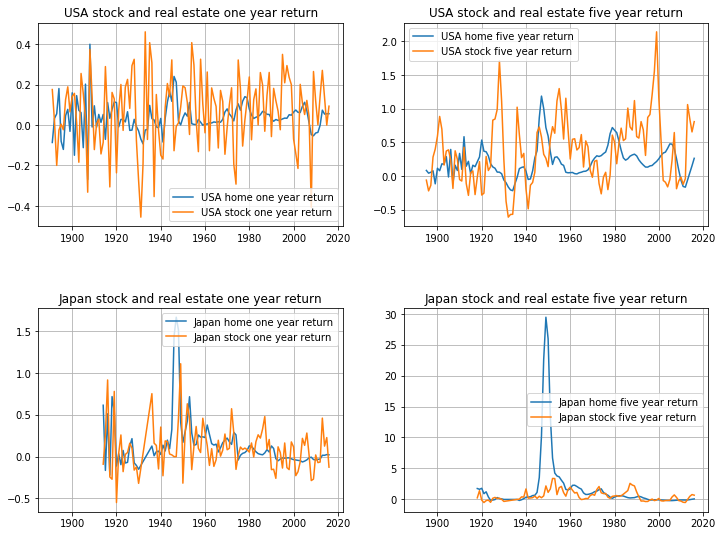

In [12]:
fig = plt.figure(figsize = (12, 9))
plt.subplots_adjust(hspace = 0.4)
ax1 = plt.subplot(221)
ax1.plot(assets_usa['year'], assets_usa['home_one_year_return'], label = 'USA home one year return')
ax1.plot(assets_usa['year'], assets_usa['stock_one_year_return'], label = 'USA stock one year return')
ax1.legend()
ax1.grid()
ax1.set_title('USA stock and real estate one year return')
ax2 = plt.subplot(222, sharex = ax1)
ax2.plot(assets_usa['year'], assets_usa['home_five_year_return'], label = 'USA home five year return')
ax2.plot(assets_usa['year'], assets_usa['stock_five_year_return'], label = 'USA stock five year return')
ax2.legend()
ax2.grid()
ax2.set_title('USA stock and real estate five year return')
ax3 = plt.subplot(223, sharex = ax1)
ax3.plot(assets_japan['year'], assets_japan['home_one_year_return'], label = 'Japan home one year return')
ax3.plot(assets_japan['year'], assets_japan['stock_one_year_return'], label = 'Japan stock one year return')
ax3.legend()
ax3.grid()
ax3.set_title('Japan stock and real estate one year return')
ax4 = plt.subplot(224, sharex = ax1)
ax4.plot(assets_japan['year'], assets_japan['home_five_year_return'], label = 'Japan home five year return')
ax4.plot(assets_japan['year'], assets_japan['stock_five_year_return'], label = 'Japan stock five year return')
ax4.legend()
ax4.grid()
ax4.set_title('Japan stock and real estate five year return')

As we can see in both the USA and Japan graphs, typically the year-over-year return of stocks has a bigger amplitude than real estate, but also much more volatile. When we smooth out the volatility a bit by calculating five-year returns, there are interchanging patterns of the return trajectories for the two types of investments. While from a top-down and very-long-term perspective we can say such patterns are still just the consequence of volatility, for every practical investing individual, a five-year horizon is long enough to play a significant role in the lifespan. Therefore we would like to examine data from a bottom-up and medium-term point of view, to see whether we can extrapolate the relative advantage of stock and real estate investments based on a few macroeconomic variables, e.g., mortgage activity, GDP growth, inflation, population growth, interest rate etc.